## Visualization

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE, SpectralEmbedding
from sklearn.pipeline import Pipeline, FunctionTransformer

import matplotlib.pyplot as plt

import pandas as pd
import sklearn

SEED = 12823

In [11]:
def label_of_cell(idx):
    stop = 2 if "_to_" in idx else 1
    return "_".join(idx.split("_")[:-stop])


color_map = {
    "init": "#00f7ff", #"#32a899",
    "init_to_stable1": "#3277a8",
    "stable1": "#3252a8",
    "init_to_bifurcation": "#32a836",
    "bifurcation_to_stable3": "#99a832",
    "init_to_stable3": "#99a832",
    "bifurcation": "#50822f",
    "stable3": "#dbdb23",
    "bifurcation_to_stable2": "#db7323",
    "init_to_stable2": "#db7323",
    "stable2": "#c24438",
}


In [12]:
def rename_columns(df):
    df.columns = [f"dim{i}" for i in range(df.shape[1])]
    return df

vis_pipeline = Pipeline([
    ('pca', PCA()),
    ('subset_pca', FunctionTransformer(lambda x: x.iloc[:, :5])),
    #('tsne', TSNE(perplexity=100)),
    #('lle', LocallyLinearEmbedding(n_neighbors=175, n_components=2, random_state=SEED)),
    #('spectral', SpectralEmbedding(n_components=3)),
    ('rename_cols', FunctionTransformer(rename_columns))
])

def plot_counts(filename):
    counts = pd.read_csv(filename, index_col=0).T
    labels = [label_of_cell(idx) for idx in counts.index]
    metadata = [[l, color_map[l]] for l in labels]
    metadata = pd.DataFrame(metadata, columns=["label", "label_color"])
    metadata.index = counts.index
    
    with sklearn.config_context(transform_output="pandas"):
        projected = vis_pipeline.fit_transform(counts)
        vis_frame = TSNE(perplexity=100, random_state=SEED).fit_transform(projected).pipe(rename_columns).join(metadata)

    ax = None
    for label, frame in vis_frame.groupby('label'):
        scatter_kwargs = dict(x='dim0', y='dim1', label=label, c=frame['label_color'], alpha=.5)
        if ax is not None:
            scatter_kwargs.update({'ax': ax})
        ax = frame.plot.scatter(**scatter_kwargs)

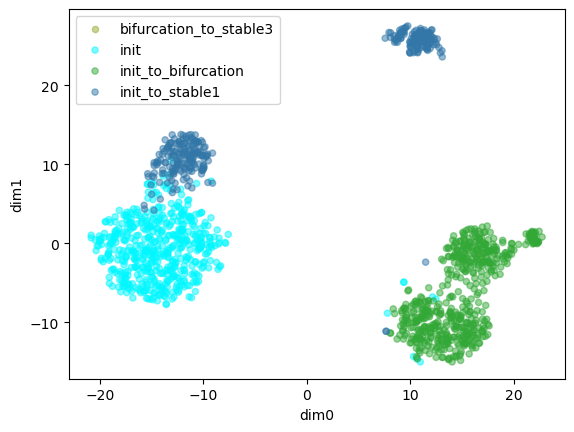

In [14]:
plot_counts("../timeseries/T1-wt-normalized-scRNAseq-dropouts.csv")

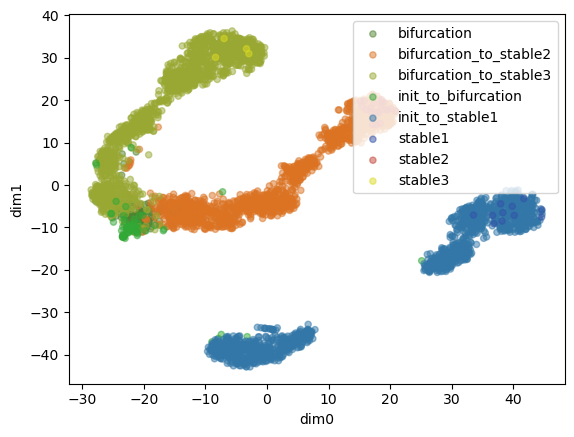

In [13]:
plot_counts("../timeseries/T10-wt-normalized-scRNAseq-dropouts.csv")

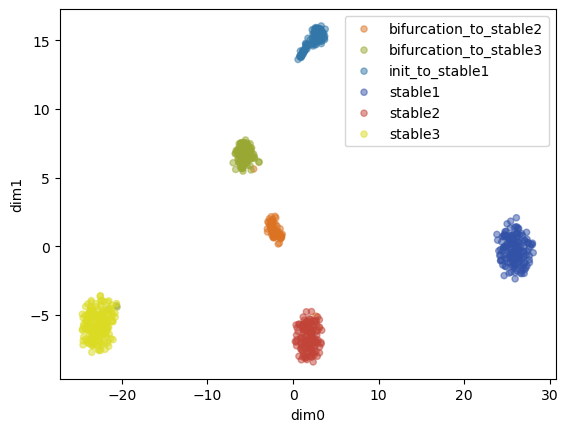

In [15]:
plot_counts("../timeseries/T20-wt-normalized-scRNAseq-dropouts.csv")

In [ ]:
plot_counts("../traj/wt-normalized-scRNAseq-dropouts.csv")

In [ ]:
plot_counts("../traj/x1UPx2KO-normalized-scRNAseq-dropouts.csv")

In [ ]:
plot_counts("../traj/x1KO-normalized-scRNAseq-nodropouts.csv")